In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

### Loading the model

In [6]:
model = tf.keras.models.load_model('/content/drive/My Drive/EPFL/Machine Learning/MA1/cnn_post_processing_sunday_night.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 140, 200)          80808200  
_________________________________________________________________
dropout_1 (Dropout)          (None, 140, 200)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 138, 600)          360600    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 136, 300)          540300    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 134, 150)          135150    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 132, 75)           33825     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9900)             

### Loading the test data

In [0]:
df_full = pd.read_csv("/content/drive/My Drive/EPFL/Machine Learning/MA1/tweets_full_new_preprocessing.csv")
df_tweets_full = df_full[['tweet','label']]
df_tweets_full = df_tweets_full.sample(frac=1, random_state=1).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(df_tweets_full['tweet'], df_tweets_full['label'], test_size=0.05, random_state=42)

In [0]:
#create word dictionary
#it will keep only the top num_words words
tokenizer = Tokenizer(num_words=120000)
tokenizer.fit_on_texts(X_train)

In [0]:
#X_train = tokenizer.texts_to_sequences(X_train)#convert each word to a integer based on the tokenizer
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

In [0]:
maxlen = 140
#X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) #makes sure all tweets have 140 words (padding)
X_test_tokenized = pad_sequences(X_test_tokenized, padding='post', maxlen=maxlen)

In [0]:
# X_train = np.asarray(X_train)
# X_test = np.asarray(X_test)

In [13]:
X_test

769240     my momma c o o l a hell bro cant wait to meet ...
1065138    user i saw this on the menu kiss and thought o...
170717     user oi mush do you have any spare pe short i ...
1399111    restructuring strategy new network and industr...
101588     when i wa in college i always looked forward t...
                                 ...                        
1358207    user you ve got a point multistop nevertheless...
733365     planet terror two disc special edition blu ray...
1765860                  aw my baby d multistop rose is hurt
2222637    user i wa so bored all day vinetta is not real...
1980250    hey grey exclamationMark i m echancers from ba...
Name: tweet, Length: 113525, dtype: object

### Making predictions

In [14]:
score = model.evaluate(X_test_tokenized, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

113525/113525 [==============================] - 26s 226us/sample - loss: 0.3284 - acc: 0.8615
Test Score: 0.3283943385994269
Test Accuracy: 0.8615371


In [0]:
#to_predict = pd.read_csv("data/test_cleaned.csv")
#_, validation_set, _, _ = train_test_split(df_tweets_full['tweet'], df_tweets_full['label'], test_size=0.05, random_state=42)
validation_set = pd.DataFrame(X_test)
to_predict = pd.DataFrame(validation_set)
to_predict.index += 1

to_predict = to_predict['tweet']
to_predict = to_predict.astype(str)

In [0]:
to_predict= tokenizer.texts_to_sequences(to_predict)

In [0]:
to_predict = pad_sequences(to_predict, padding='post', maxlen=maxlen)

In [0]:
result_test = model.predict(to_predict)

In [0]:
result_test

array([[0.9923058 ],
       [0.60865974],
       [0.02351871],
       ...,
       [0.01635775],
       [0.0622136 ],
       [0.97067225]], dtype=float32)

In [0]:
result_test

Our model's accuracy is 0.862928870292887 for a threshold of 0.44
Our model's accuracy is 0.8629376789253468 for a threshold of 0.4403448275862069
Our model's accuracy is 0.862928870292887 for a threshold of 0.4406896551724138
Our model's accuracy is 0.8630257652499449 for a threshold of 0.44103448275862067
Our model's accuracy is 0.8630521911473243 for a threshold of 0.4413793103448276
Our model's accuracy is 0.8631050429420832 for a threshold of 0.4417241379310345
Our model's accuracy is 0.8630257652499449 for a threshold of 0.4420689655172414
Our model's accuracy is 0.8630081479850253 for a threshold of 0.4424137931034483
Our model's accuracy is 0.8629552961902665 for a threshold of 0.44275862068965516
Our model's accuracy is 0.8629729134551861 for a threshold of 0.44310344827586207
Our model's accuracy is 0.8630169566174851 for a threshold of 0.443448275862069
Our model's accuracy is 0.8629641048227262 for a threshold of 0.4437931034482759
Our model's accuracy is 0.8629112530279675

Text(0, 0.5, 'Validation set accuracy')

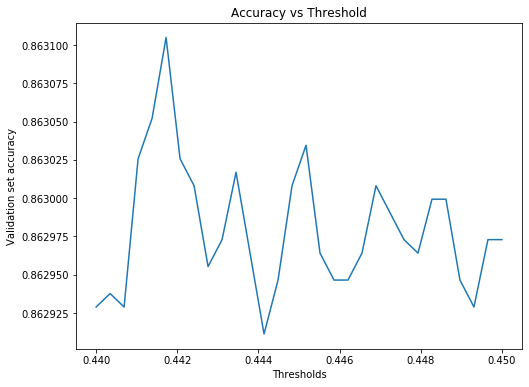

In [0]:
#it returns values between [0,1] (since sigmoid is used) 
# result_test[result_test < 0.5] = -1 #replace values < 0.5 to -1
# result_test[result_test >= 0.5] = 1
thresholds = np.linspace(0.44, 0.45 ,30)
accuracies =[]
for t in thresholds:
  preds = result_test.copy()
  preds[preds <= t] = 0
  preds[preds > t] = 1
  accuracies.append(metrics.accuracy_score(y_test, preds))
  print(f'Our model\'s accuracy is {metrics.accuracy_score(y_test, preds)} for a threshold of {t}')

plt.figure(figsize=(8,6))
plt.plot(thresholds, accuracies)
plt.title("Accuracy vs Threshold")
plt.xlabel("Thresholds")
plt.ylabel("Validation set accuracy")

## Submitting with a different threshold

In [0]:
to_predict = pd.read_csv("/content/drive/My Drive/EPFL/Machine Learning/MA1/test_cleaned.csv")

to_predict.index += 1

to_predict = to_predict['tweet']
to_predict = to_predict.astype(str)

to_predict= tokenizer.texts_to_sequences(to_predict)

to_predict = pad_sequences(to_predict, padding='post', maxlen=maxlen)

result_test = model.predict(to_predict)

#it returns values between [0,1] (since sigmoid is used) 
result_test[result_test < 0.4417] = -1
result_test[result_test >= 0.4417] = 1

In [0]:
result_test

In [0]:
import csv

def create_csv_submission(y_pred, path):
    """
    Creates an output file in csv format for submission to kaggle
    Arguments: ids (event ids associated with each prediction)
               y_pred (predicted class labels)
               path (string name of .csv output file to be created)
    """
    ids=[i for i in range(1,len(y_pred)+1)]
    with open(path, 'w', newline='') as csvfile:
        fieldnames = ['Id', 'Prediction']
        writer = csv.DictWriter(csvfile, delimiter=",", fieldnames=fieldnames)
        writer.writeheader()
        for r1, r2 in zip(ids, y_pred):
            writer.writerow({'Id':int(r1),'Prediction':int(r2)})


In [0]:
create_csv_submission(result_test,"/content/drive/My Drive/EPFL/Machine Learning/MA1/cnn_submission_6_epochs_with_processed_with_thres_04.csv")